## Aggregate the network with an optimization method

In [33]:
import sys
sys.path.append('../src')
import utils_mistral as utils
import test_mistral_copy as models
import visuals as v
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from itertools import product
import xarray as xr
import importlib

importlib.reload(models)
importlib.reload(utils)
importlib.reload(v)

<module 'visuals' from 'c:\\Users\\g630d\\Documents\\00_Cours\\2024-2025_MIT\\00 Thesis\\Dev\\notebooks\\../src\\visuals.py'>

In [2]:
config = utils.Config(demand = "k-interpolation", k_weight_demand= 1)

In [14]:
nodes_df = pd.read_csv('../DATA/Dev/new_england_counties2019.csv')
wind_df = pd.read_csv(
    '../DATA/Dev/county-level-CFs/hist/wind/cf_local_county_2014.csv').iloc[:, 1:]
solar_df = pd.read_csv(
    '../DATA/Dev/county-level-CFs/hist/solar/cf_local_county_2014.csv').iloc[:, 1:]
demand_df = pd.read_csv('../DATA/dev/demand_hist/county_demand_local_hourly_2013.csv').iloc[:, 1:]

In [39]:
from dataclasses import dataclass, field, asdict

metadata = {
            'num_nodes1': nodes_df.shape[0],
            'num_nodes2': nodes_df.shape[0]
        }

config_dict = asdict(config)
del config_dict['file_paths']
for key in config_dict:
    metadata[key] = config_dict[key]

In [40]:
metadata

{'num_nodes1': 67,
 'num_nodes2': 67,
 'year': 2013,
 'demand': 'k-interpolation',
 'k_neighbors_CF': 3,
 'k_weight_demand': 1,
 'time_scale': 'monthly',
 'drop_duplicates': True,
 'n_repr': 5,
 'k_representative_days': 5,
 'weights': {'position': 1.0,
  'time_series': 1.0,
  'duration_curves': 1.0,
  'rdc': 1.0,
  'intra_correlation': 1.0,
  'inter_correlation': 1.0,
  'supply_demand_mismatch': 1.0}}

: 

In [38]:
pd.DataFrame(metadata)

,num_nodes1,num_nodes2,year,demand,k_neighbors_CF,k_weight_demand,time_scale,drop_duplicates,n_repr,k_representative_days,weights,file_paths
position,67,67,2013,k-interpolation,3,1,monthly,True,5,5,1.0,NaN
time_series,67,67,2013,k-interpolation,3,1,monthly,True,5,5,1.0,NaN
duration_curves,67,67,2013,k-interpolation,3,1,monthly,True,5,5,1.0,NaN
rdc,67,67,2013,k-interpolation,3,1,monthly,True,5,5,1.0,NaN
intra_correlation,67,67,2013,k-interpolation,3,1,monthly,True,5,5,1.0,NaN
inter_correlation,67,67,2013,k-interpolation,3,1,monthly,True,5,5,1.0,NaN
supply_demand_mismatch,67,67,2013,k-interpolation,3,1,monthly,True,5,5,1.0,NaN
nodes,67,67,2013,k-interpolation,3,1,monthly,True,5,5,NaN,../DATA/dev/NewEngland-HVbuses.csv
demand,67,67,2013,k-interpolation,3,1,monthly,True,5,5,NaN,../DATA/dev/demand_hist/county_demand_local_ho...
wind_cf,67,67,2013,k-interpolation,3,1,monthly,True,5,5,NaN,../DATA/dev/CapacityFactors_ISONE/Wind/cf_Wind...


In [18]:
# Load CSV data
TimeSeries = {'wind': wind_df, 'solar': solar_df};

In [25]:
network = utils.Network(nodes_df, demand_df, TimeSeries, config)

c:\Users\g630d\Documents\00_Cours\2024-2025_MIT\00 Thesis\Dev\notebooks\../src\utils_mistral.py:159: RuntimeWarning: divide by zero encountered in divide
  weights = 1 / nearest_distances
c:\Users\g630d\Documents\00_Cours\2024-2025_MIT\00 Thesis\Dev\notebooks\../src\utils_mistral.py:160: RuntimeWarning: invalid value encountered in divide
  weights /= weights.sum()


The 'features' dictionary has been created and can be accessed as '.features'
It is a dictionary with keys for each node in range(0, 67).
Each value is a dictionary with the features of that node.

Example structure:
network.features[0].keys() = dict_keys(['position', 'time_series', 'duration_curves', 'ramp_duration_curves', 'correlation', 'supply_demand_mismatch'])

Details:
  - Position: A tuple (latitude, longitude) of that node.
  - Time series: A dictionary with keys for each time series type in dict_keys(['wind', 'solar'])
    and values as the time series itself.
  - Duration Curves: A dictionary with keys for each time series type in dict_keys(['wind', 'solar'])
    and values as the duration curve of the time series.
  - Ramp Duration Curves (RDCs): A dictionary with keys for each time series type dict_keys(['wind', 'solar'])
    and values as the RDC (found by differentiating and subsequently sorting) of the time series.
  - Correlation: A dictionary with keys as tuples of ty

In [34]:
aggregator = models.SpatialAggregation(network.features, config)

In [43]:
optimized_assignment_dict = aggregator.optimize()

Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 6788631 rows, 6788630 columns and 20360680 nonzeros
Model fingerprint: 0x4427af3e
Variable types: 0 continuous, 6788630 integer (6788630 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-07, 7e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+00]
Presolve removed 0 rows and 0 columns (presolve time = 5s) ...
Presolve removed 0 rows and 0 columns (presolve time = 10s) ...
Presolve removed 0 rows and 0 columns (presolve time = 15s) ...
Presolve removed 0 rows and 0 columns (presolve time = 20s) ...
Presolve removed 0 rows and 0 columns (presolve time = 25s) ...
Presolve removed 0 rows and 0 columns (presolve time = 30s) ...
Presolve removed 0 rows and 0 columns (pres

GurobiError: Out of memory

In [83]:
cluster_assignment_dict = aggregator.cluster_KMedoids()

In [45]:
eval_KMedoids = aggregator.compute_metrics(aggregation_method = 'kmedoids', type="custom")

In [19]:
eval_opti = aggregator.compute_metrics(aggregation_method = 'optimization', type="custom")

In [79]:
importlib.reload(v)
visualizer = v.Visualization(aggregator)

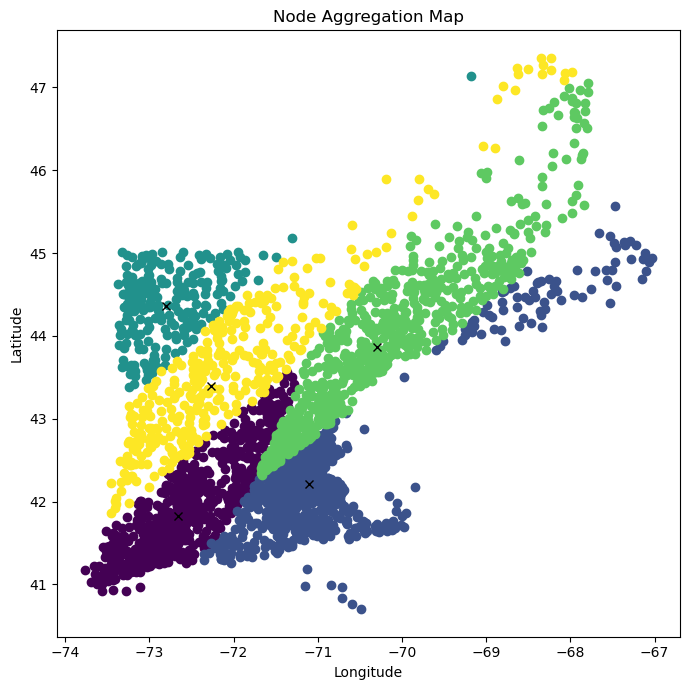

In [80]:
visualizer.plot_map(aggregation_method='kmedoids')

In [ ]:
visualizer.plot_map(aggregation_method='optimization')

In [66]:
print('kmedoids')
print('- Number of clusters: ', len(cluster_centers))
print('- Representatives: ', cluster_centers)
print('- Number of nodes in each cluster:')
for i in range(len(cluster_centers)):
    print(f'  Cluster {i}: {len(cluster_assignment_dict[i])} nodes')

print("optimization")
print('- Number of clusters: ', len(opti_rep))
print('- Representatives: ', opti_rep)
print('- Number of nodes in each cluster:')
for i in range(len(opti_rep)):
    print(f'  Cluster {i}: {int(assignment_matrix_result[:, opti_rep[i]].sum())} nodes')

kmedoids
- Number of clusters:  5
- Representatives:  [113, 1015, 2578, 674, 1825]
- Number of nodes in each cluster:
  Cluster 0: 639 nodes
  Cluster 1: 227 nodes
  Cluster 2: 647 nodes
  Cluster 3: 327 nodes
  Cluster 4: 765 nodes
optimization
- Number of clusters:  5
- Representatives:  [113, 672, 1015, 1825, 2578]
- Number of nodes in each cluster:
  Cluster 0: 639 nodes
  Cluster 1: 325 nodes
  Cluster 2: 229 nodes
  Cluster 3: 765 nodes
  Cluster 4: 647 nodes


In [91]:
for i in range(5):
    cluster_assignment_dict.pop(i)

In [96]:
importlib.reload(models)
temp = models.TemporalAggregation(aggregator,cluster_assignment_dict)

In [98]:
a = temp.aggregate()